In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
#create dataframe/load data
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()
#we have 768 values, from this info, it appears there are no missing values
#9 attributes, 7 of type int64, 2 of  float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()
#we can use .describe() to get some stats about the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#however, further examination of the data shows that there are some attributes where a zero value makes no sense
#we can assume that a zero in these columns represents a missing value
#these attributes are Glucose, BloodPressure, SkinThickness, Insulin, and BMI
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

diabetes_df_copy.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


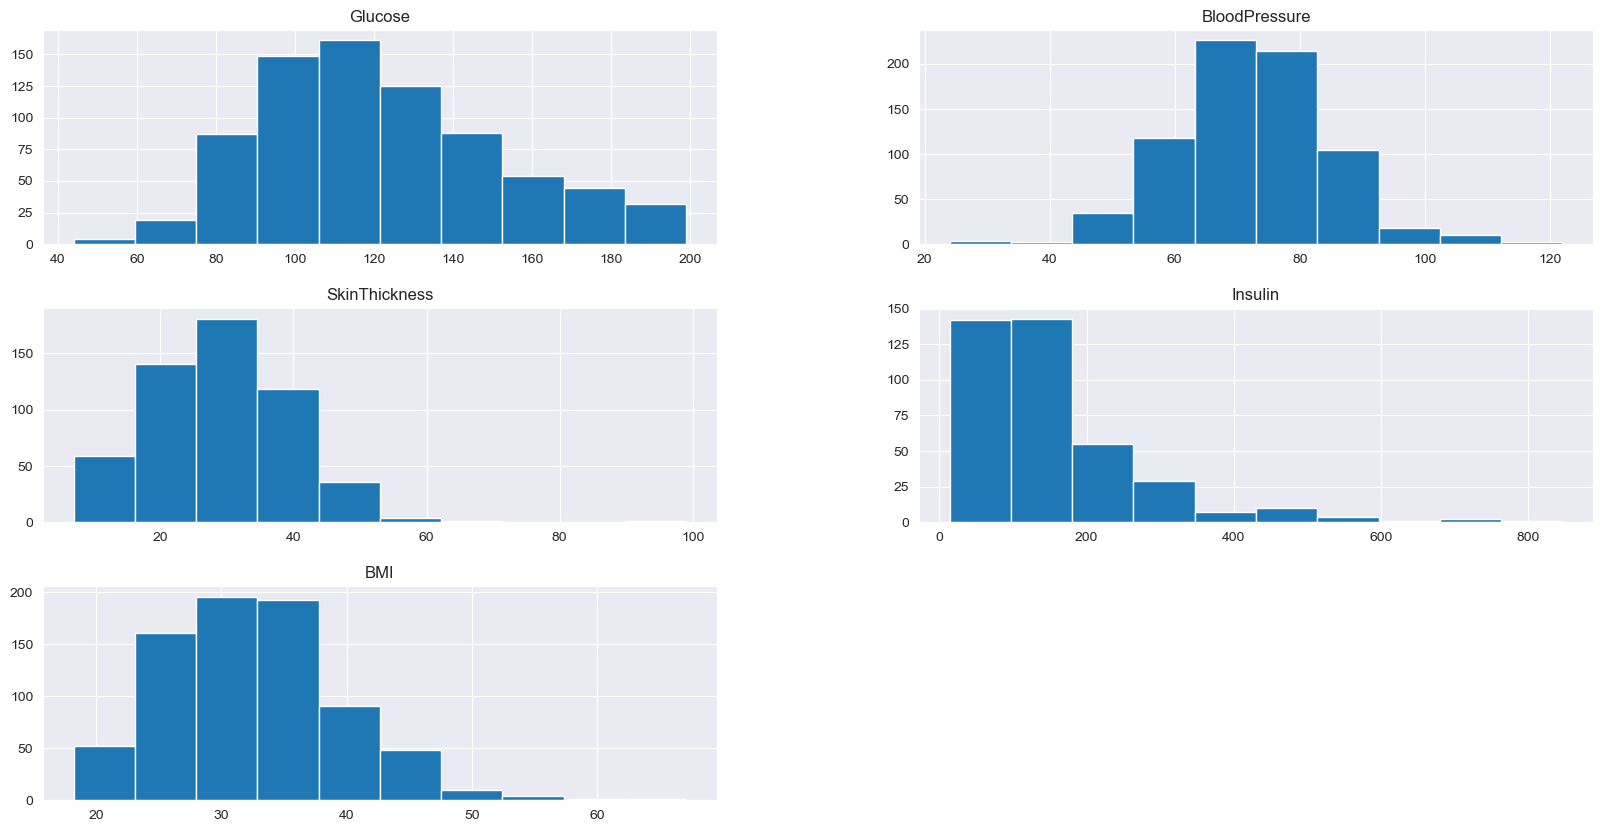

In [8]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10))
plt.show()

In [9]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)

In [10]:
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

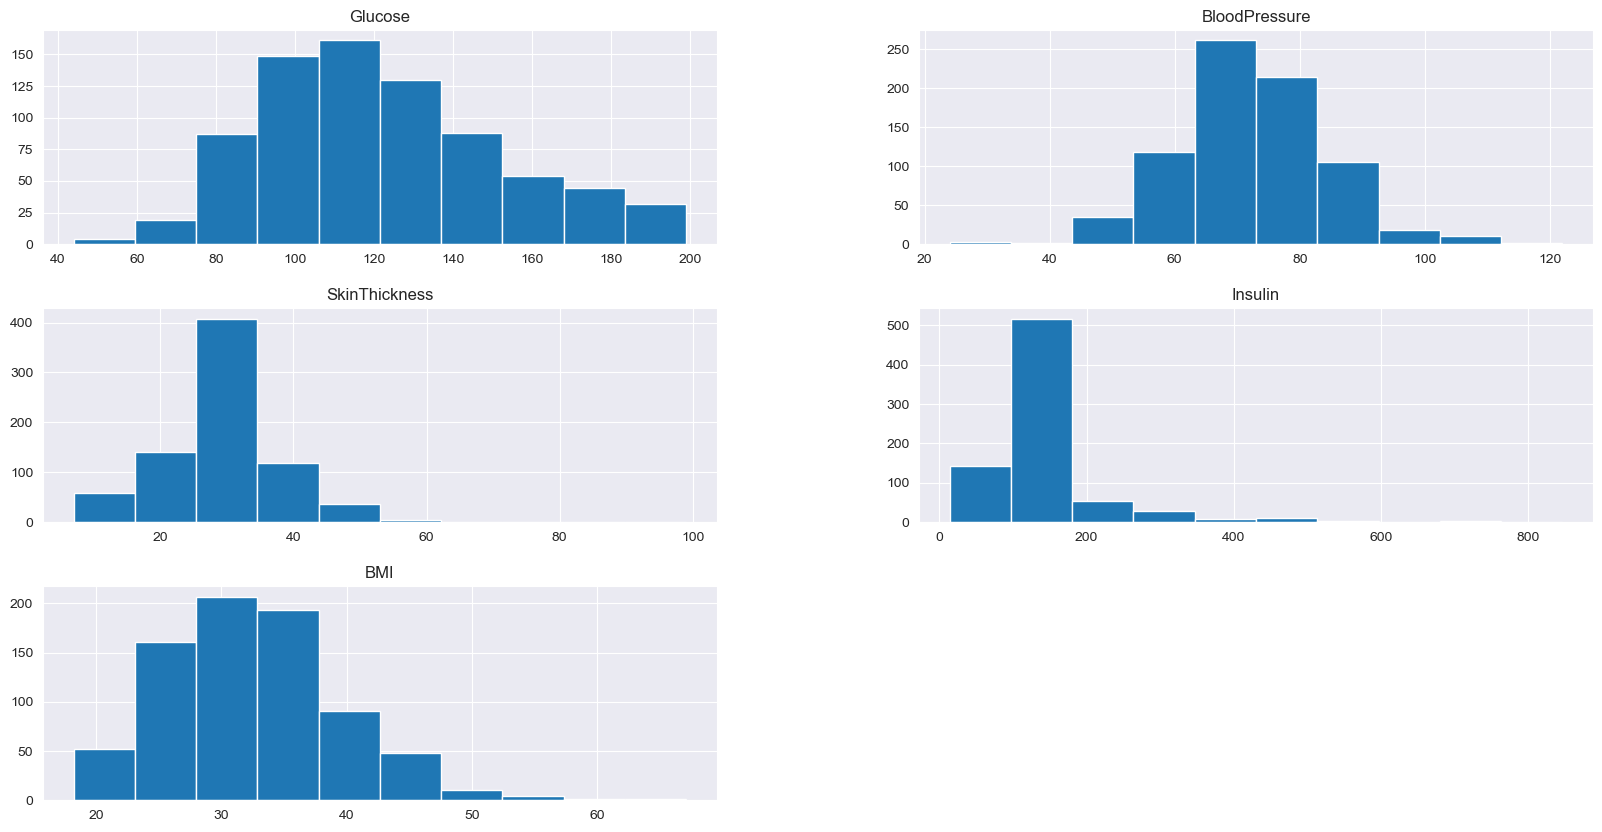

In [11]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10))
plt.show()

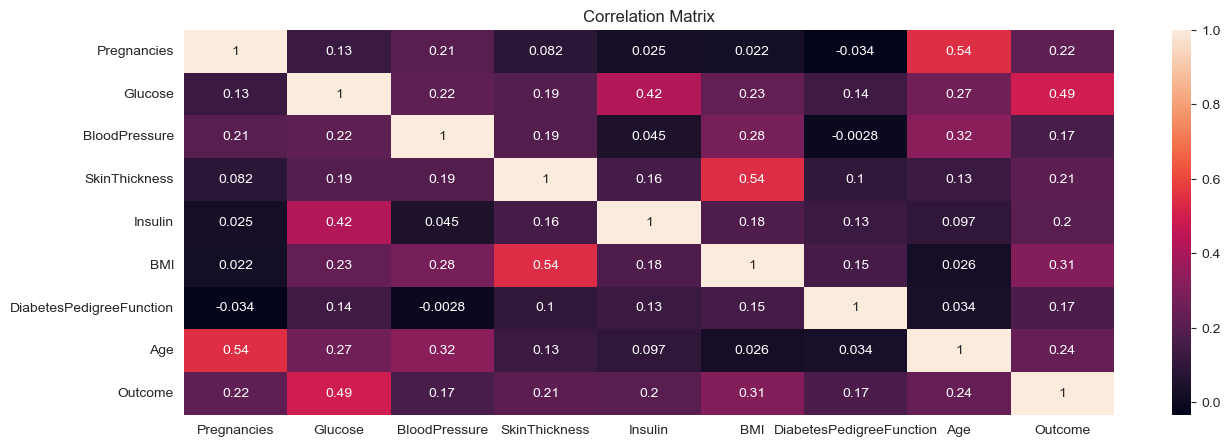

In [12]:
#now we will look for anycorrelations with a heatmap
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
#this heatmap shows that there are no signifigant cases of multicollinearity

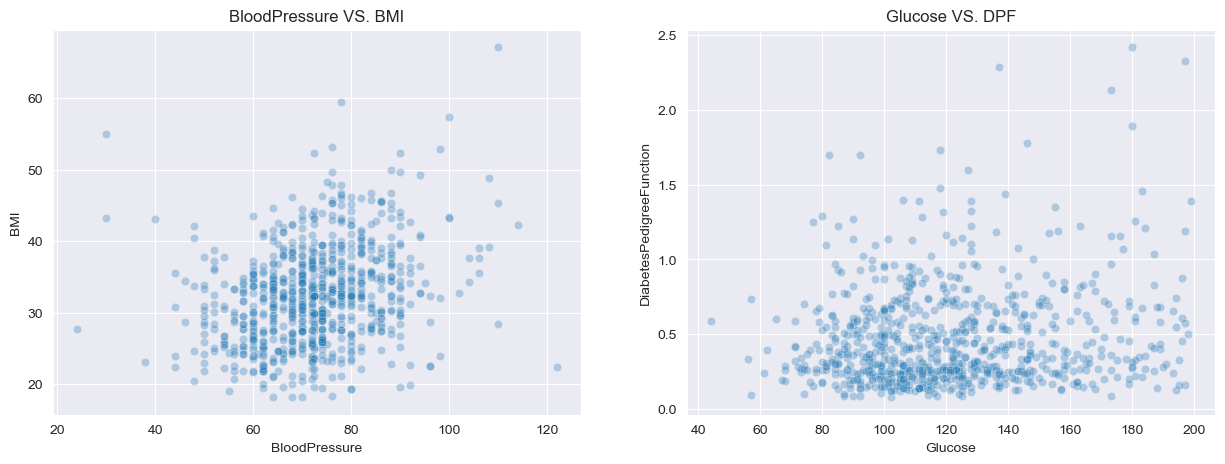

In [13]:
#now plot some scatterplots to try to learn more about the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. DPF')

plt.show()

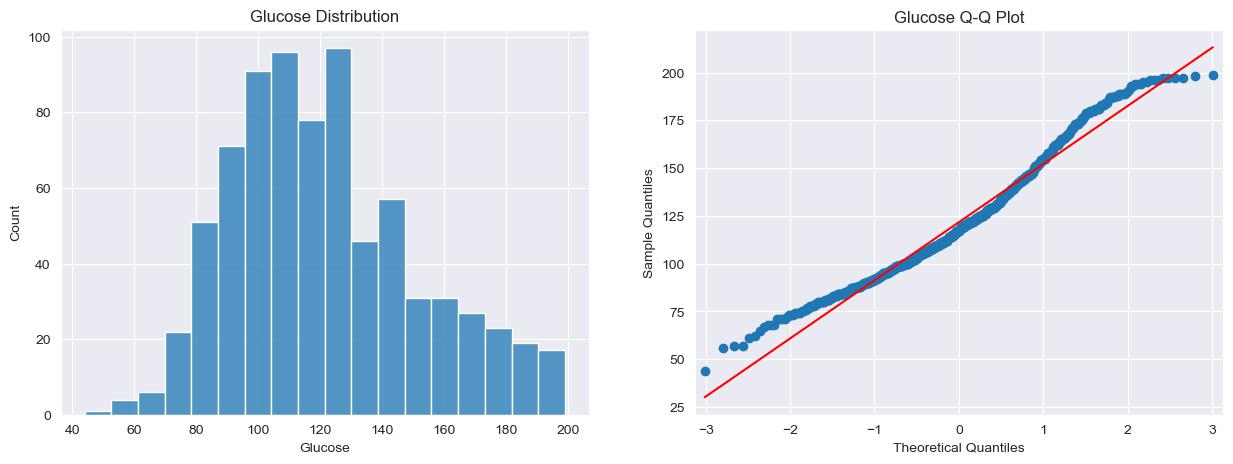

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [14]:
#now do a QQ plot
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))
print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))


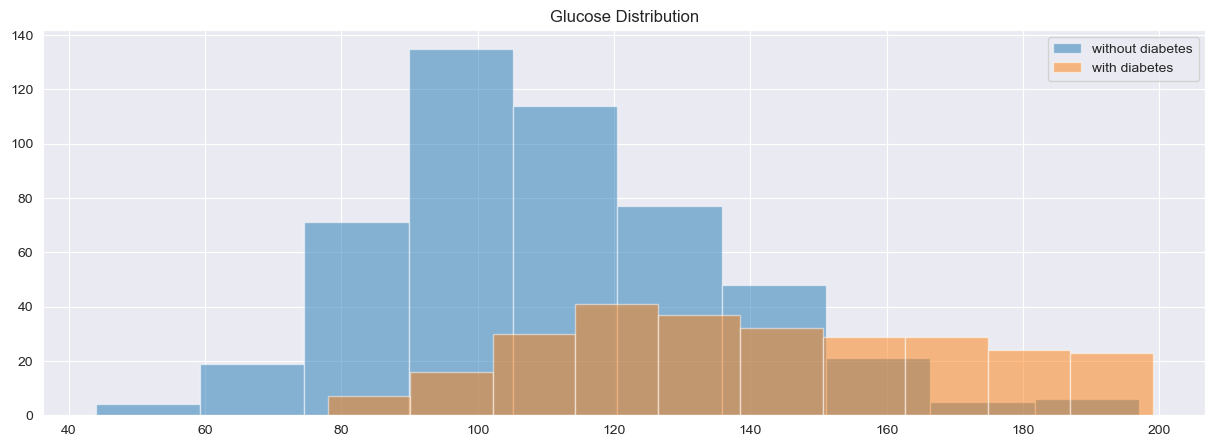

In [15]:
#first split data into 2 classes, those with diabetes and those without
without_diabetes = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
with_diabetes = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

#then plot those with and those without on the same plot 
#set alpha to .5 so they are transparent and we can see both histograms/distributions
plt.hist(x=without_diabetes['Glucose'], label='without diabetes', alpha=0.5)
plt.hist(x=with_diabetes['Glucose'], label='with diabetes', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

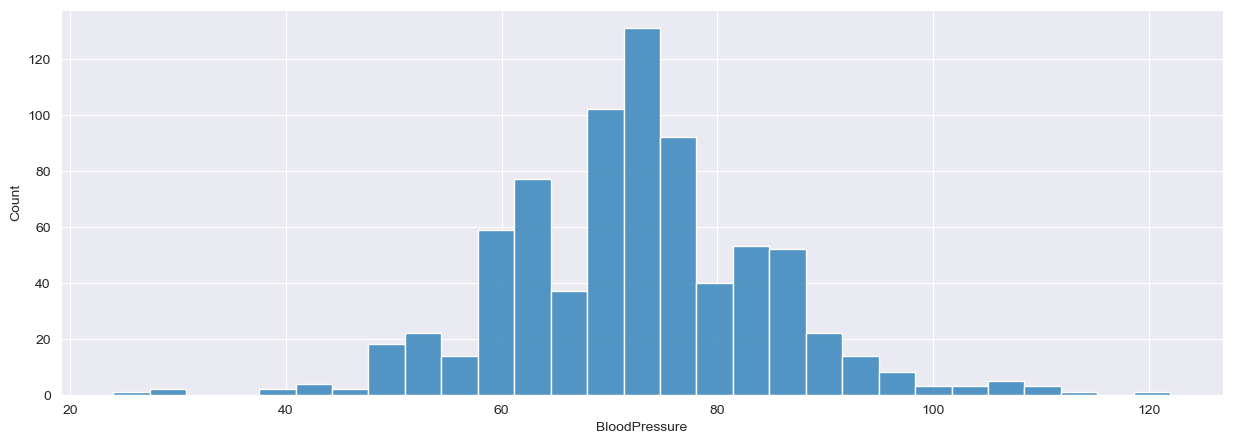

In [16]:
sns.histplot(diabetes_df_copy['BloodPressure'])

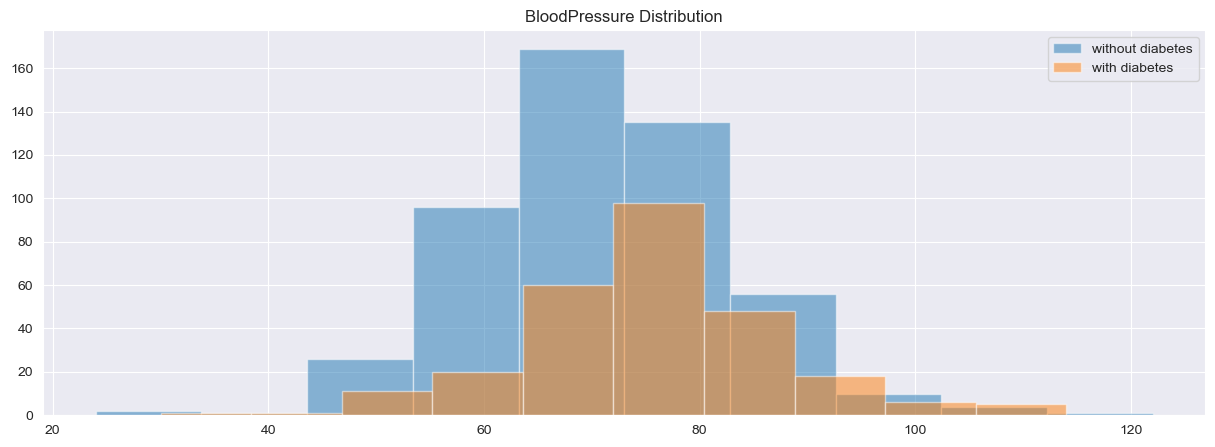

In [17]:
#now we can repeat the histogram seperating those with and without diabetes
plt.hist(x=without_diabetes['BloodPressure'], label='without diabetes', alpha=0.5)
plt.hist(x=with_diabetes['BloodPressure'], label='with diabetes', alpha=0.5)
plt.legend()
plt.title('BloodPressure Distribution')

plt.show()

<Axes: xlabel='BMI', ylabel='Count'>

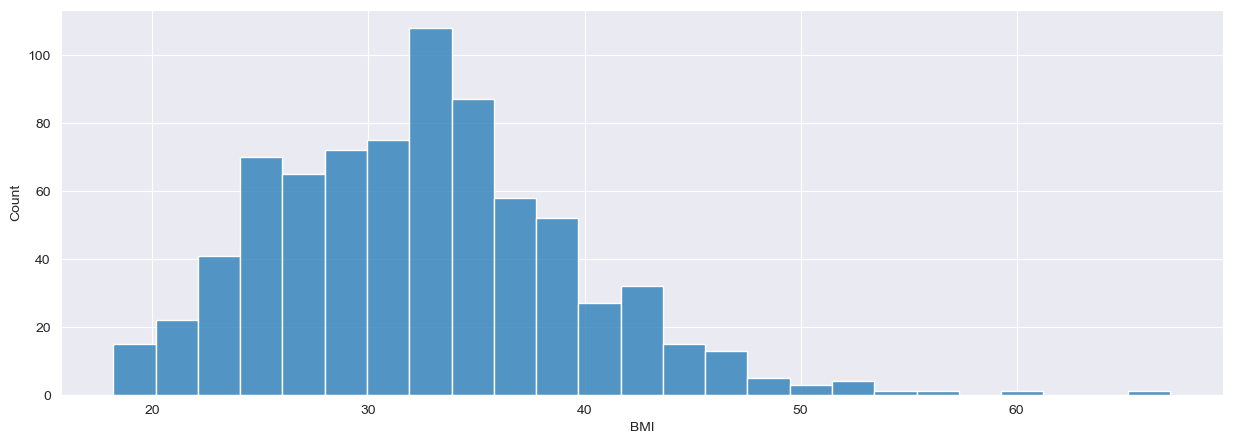

In [18]:
#now lets look at BMI
sns.histplot(diabetes_df_copy['BMI'])

#this graph displays right skew 
#overall, most BMI values fall between 15-40

In [19]:
print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['BMI'])))

Skewness of the data: 
0.5980615087222572



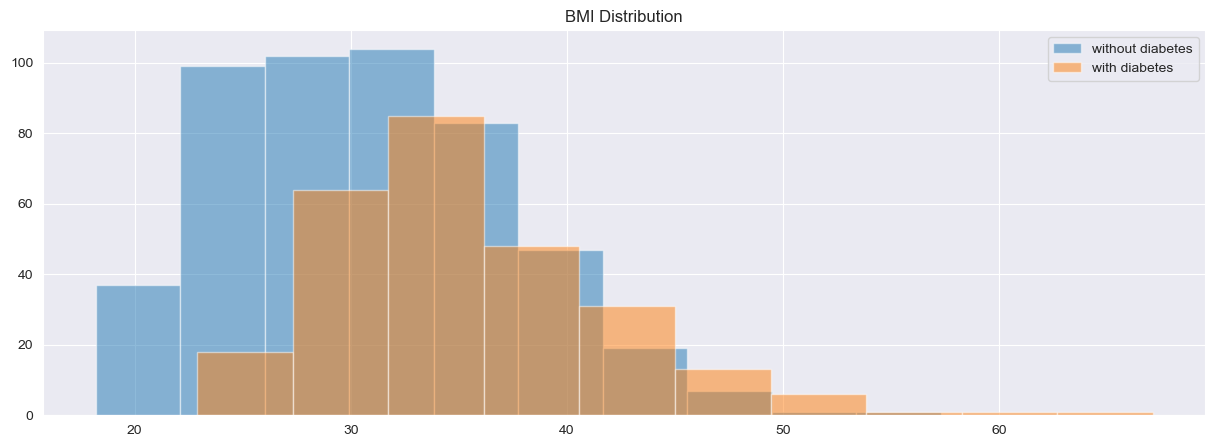

In [20]:
#now plot BMI historgram based on outcome/diabetes
plt.hist(x=without_diabetes['BMI'], label='without diabetes', alpha=0.5)
plt.hist(x=with_diabetes['BMI'], label='with diabetes', alpha=0.5)
plt.legend()
plt.title('BMI Distribution')

plt.show()

C:\Users\svemi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


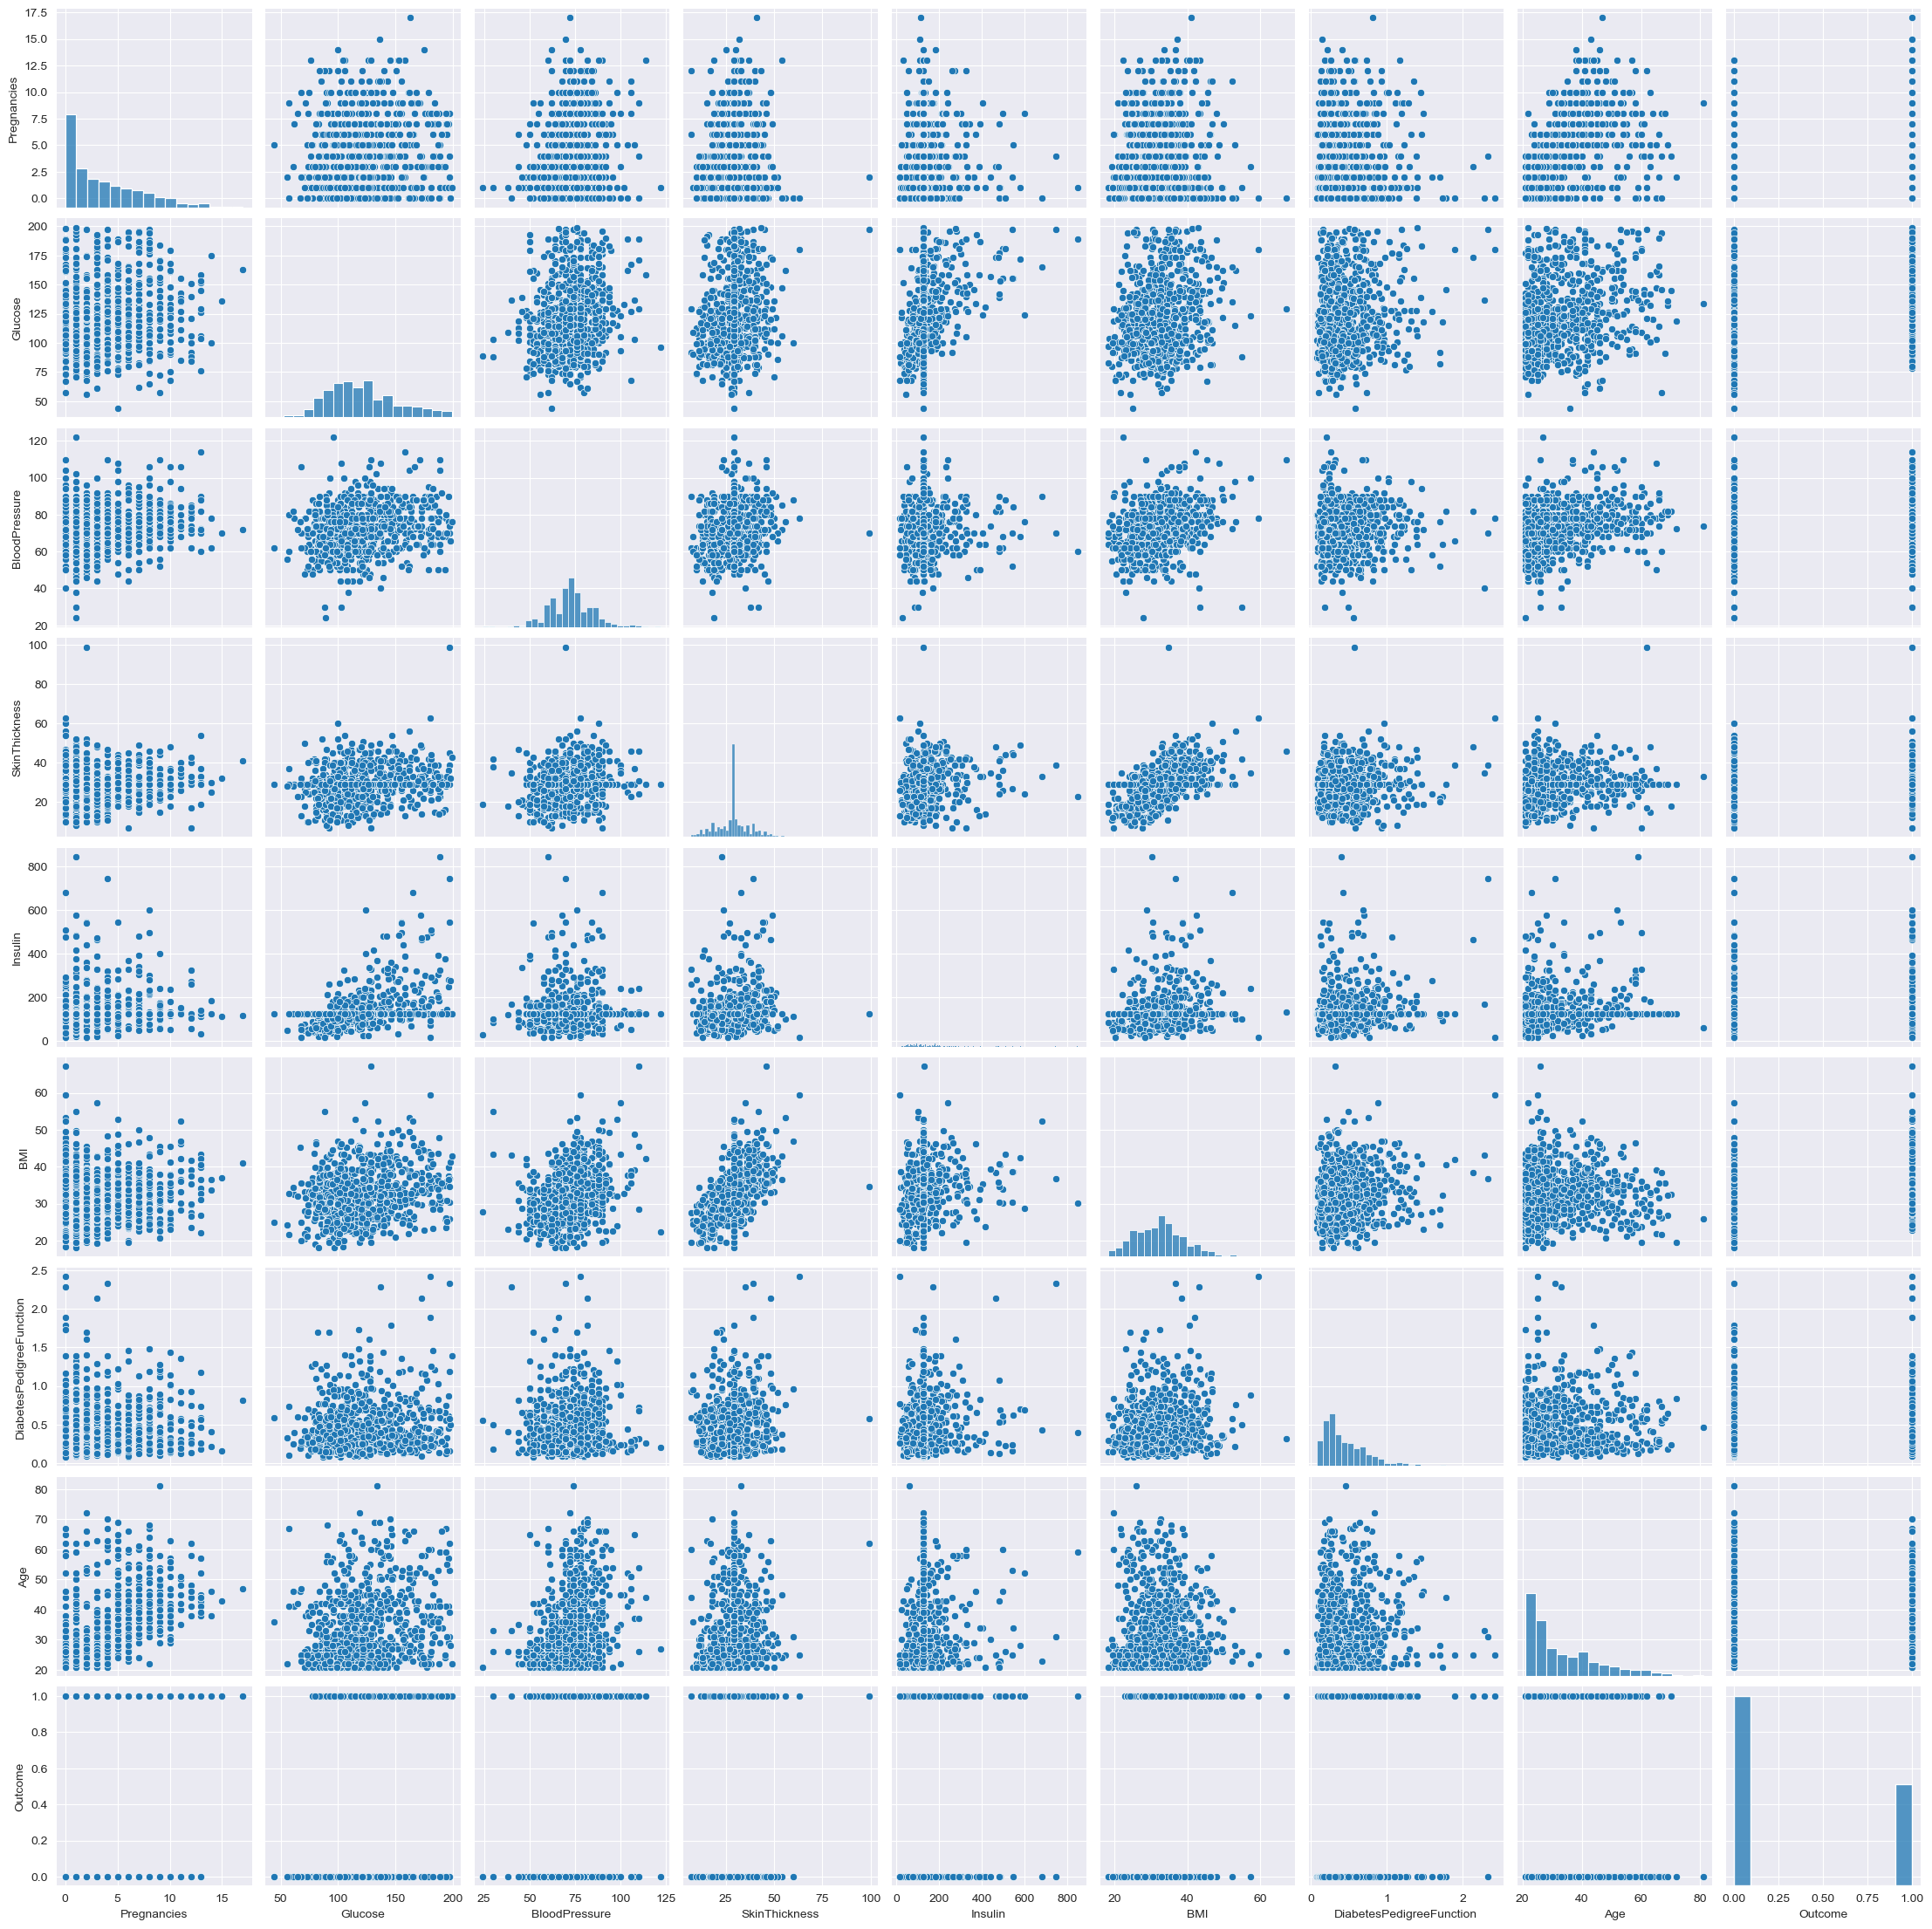

In [21]:
sns.pairplot(diabetes_df_copy)

In [22]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [24]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


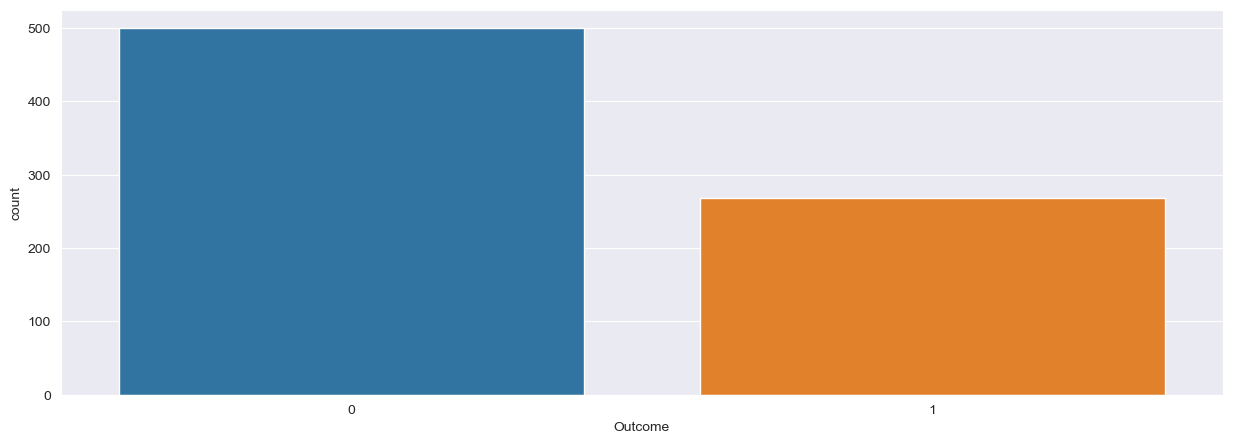

In [25]:
# Create  model to train
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

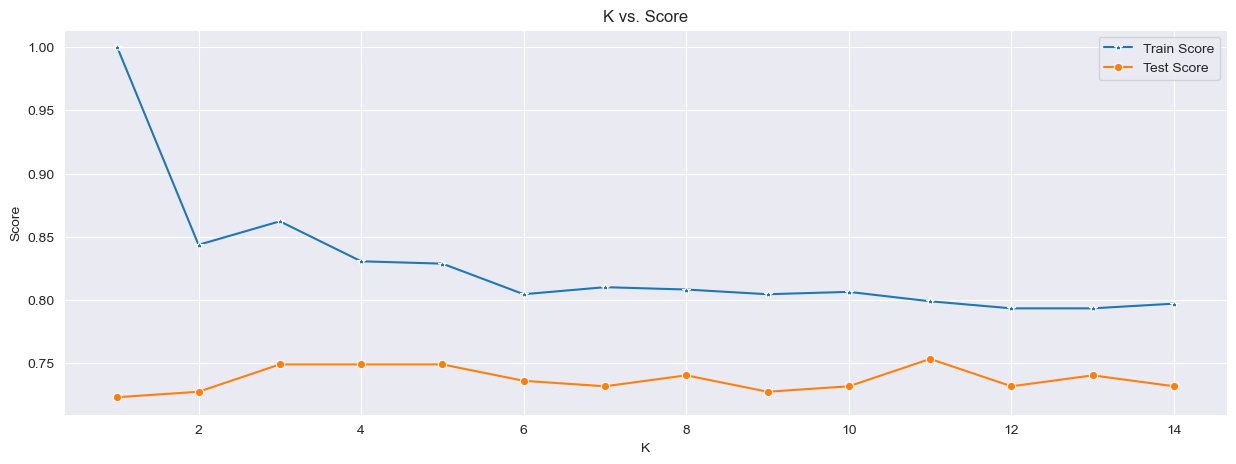

In [28]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [29]:
#train final model
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

In [30]:
#finally, print out a confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]


In [31]:
# Improve the score
#try using a different scaling method
from sklearn.preprocessing import MinMaxScaler

X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

#create our scaler object
scaler = MinMaxScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [34]:
#test different k values
test_scores = []
train_scores = []

#test k values 1-14
for i in range(1,15):
    #create model
    knn = KNeighborsClassifier(n_neighbors=i)
    #train model
    knn.fit(X_train,y_train)
    
    #append scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

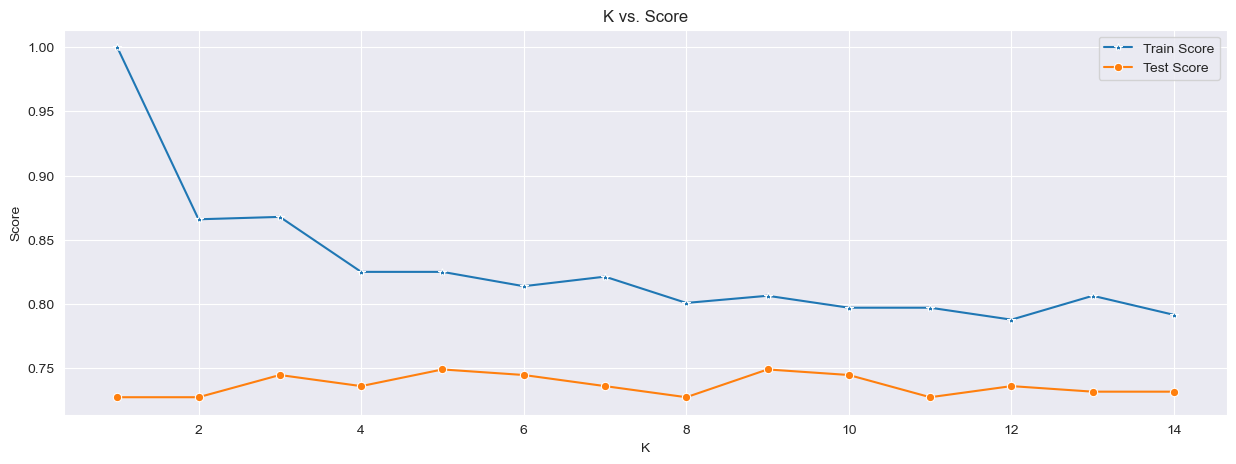

In [35]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [36]:
#max test score appears to be at k=9
#find exact value
knn = KNeighborsClassifier(9)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7489177489177489

In [37]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler

# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [38]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.142857,0.665359,1.235294
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.626374,-0.056209,0.117647
2,1.0,1.629630,-0.512662,0.000000,0.000000,-0.989011,0.783007,0.176471
3,-0.4,-0.691358,-0.387662,-0.857143,-5.391304,-0.461538,-0.537255,-0.470588
4,-0.6,0.493827,-2.012662,0.857143,7.478261,1.186813,5.007843,0.235294


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [40]:
#test different k values
test_scores = []
train_scores = []

#test k values 1-14
for i in range(1,15):
    #create model
    knn = KNeighborsClassifier(n_neighbors=i)
    #train model
    knn.fit(X_train,y_train)
    
    #append scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

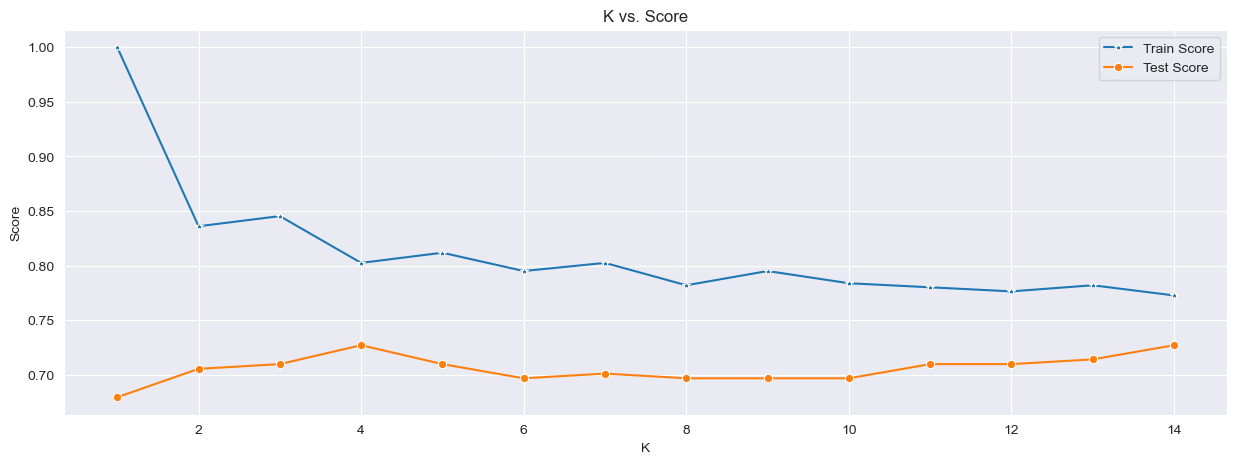

In [41]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [42]:
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#test different k values
test_scores = []
train_scores = []

#test k values 1-30
for i in range(1,30):
    #create model
    knn = KNeighborsClassifier(n_neighbors=i)
    #train model
    knn.fit(X_train,y_train)
    
    #append scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

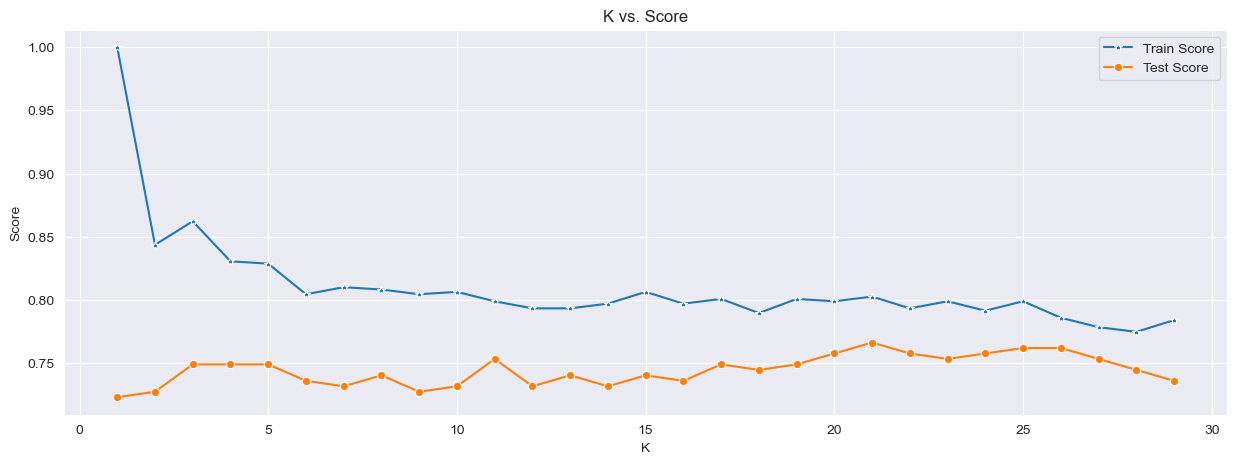

In [43]:
sns.lineplot(x=range(1,30), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,30), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [44]:
knn = KNeighborsClassifier(21)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7662337662337663

In [45]:
# Different dataset
cancer_df = pd.read_csv('breast_cancer_data.csv')
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
cancer_df_copy = cancer_df.copy(deep=True)

In [48]:
cancer_df_copy = cancer_df[cancer_df.columns.drop(list(cancer_df.filter(regex='_se')))]
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_worst             569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  perimeter_worst          5

In [49]:
cancer_df_copy = cancer_df_copy[cancer_df_copy.columns.drop(list(cancer_df_copy.filter(regex='_worst')))]
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  Unnamed: 32             0 non-null      float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


In [50]:
cancer_df_copy.drop(cancer_df_copy.columns[12],axis=1, inplace=True)
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [51]:
#also drop id column
cancer_df_copy.drop(cancer_df_copy.columns[0],axis=1, inplace=True)
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [52]:
#we need to make the categorical diagnosis attribute a numerical attribute
#make 'M' or malignant a 1
#make 'B' or benign a 0
cancer_df_copy['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [53]:
cancer_df_copy.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


In [54]:
cancer_df_copy.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


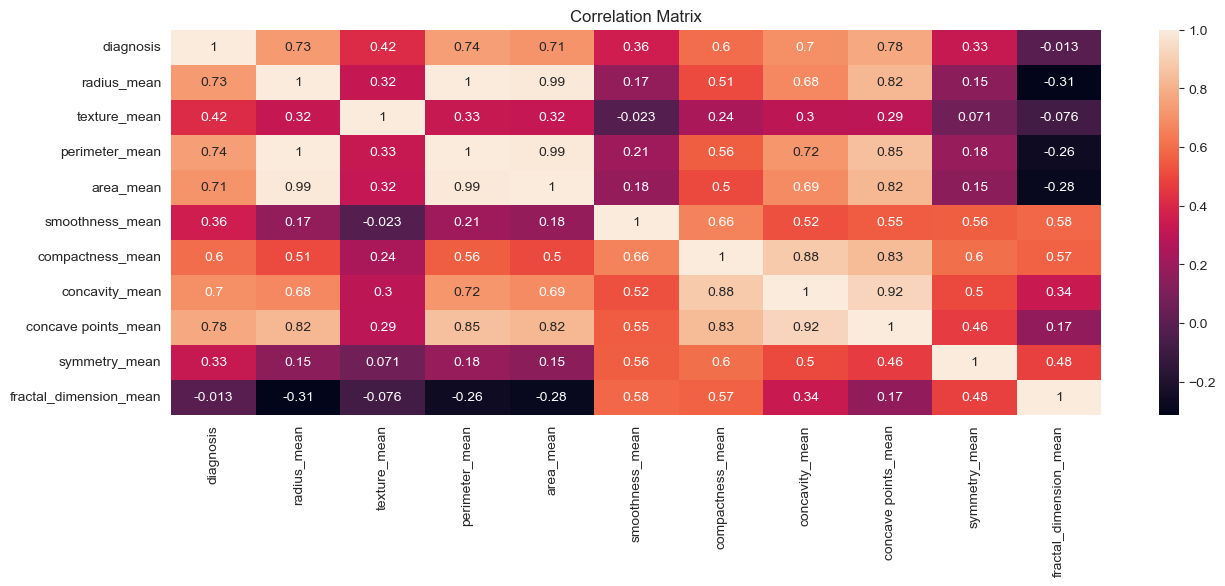

In [56]:
sns.heatmap(cancer_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [57]:
#some values have multicollinearity, drop some columns
#ex, radius determines area and perimeter, can drop area and perimeter
cancer_df_copy.drop(cancer_df_copy.columns[4],axis=1, inplace=True)
cancer_df_copy.drop(cancer_df_copy.columns[3],axis=1, inplace=True)
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   concavity_mean          569 non-null    float64
 6   concave points_mean     569 non-null    float64
 7   symmetry_mean           569 non-null    float64
 8   fractal_dimension_mean  569 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 40.1 KB


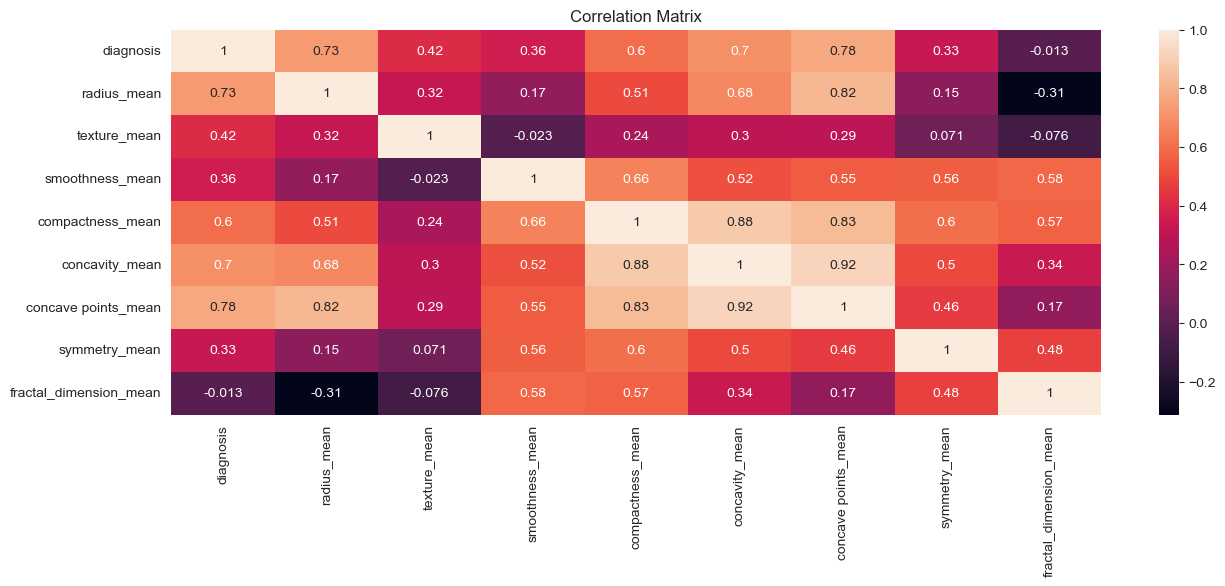

In [58]:
sns.heatmap(cancer_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [59]:
cancer_df_copy.drop(cancer_df_copy.columns[6],axis=1, inplace=True)
cancer_df_copy.drop(cancer_df_copy.columns[4],axis=1, inplace=True)
cancer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   concavity_mean          569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


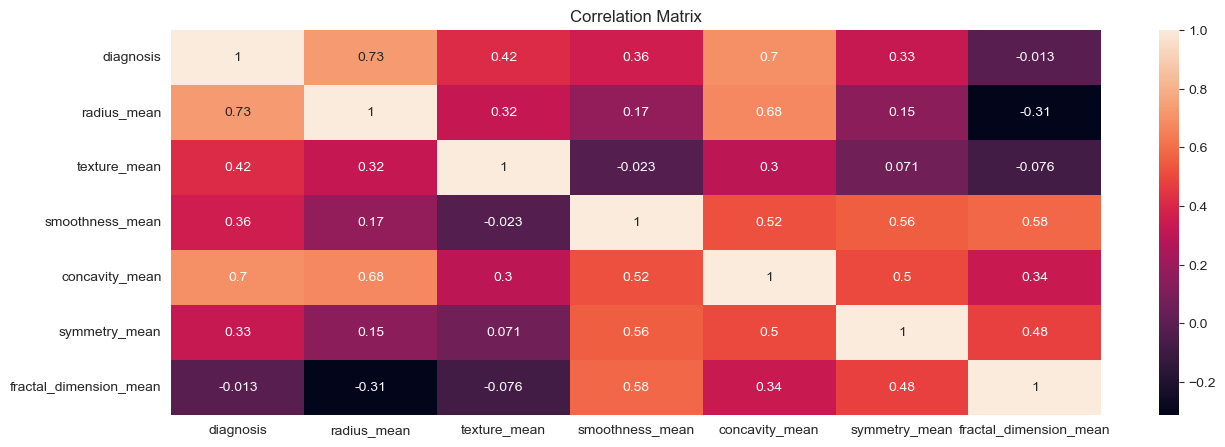

In [60]:
sns.heatmap(cancer_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
#now multicollinearity is removed

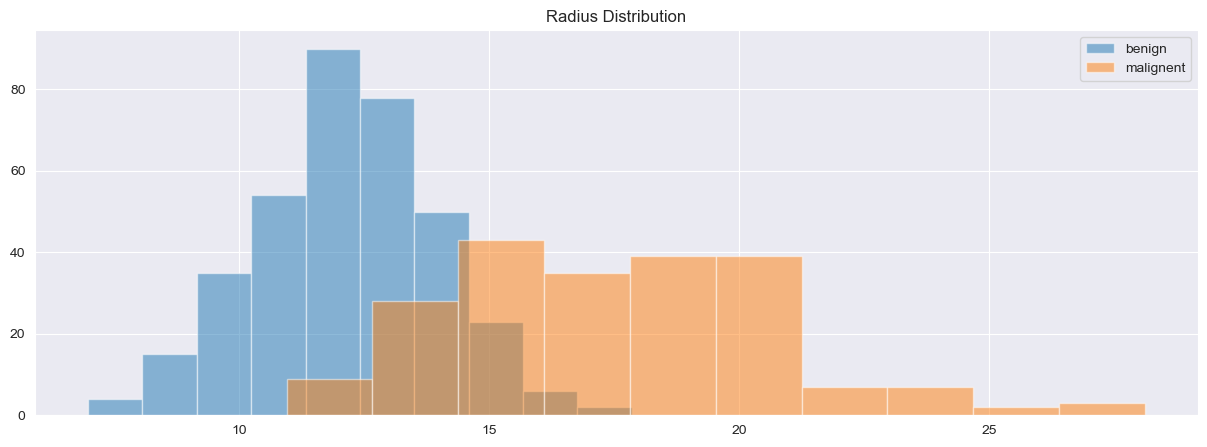

In [61]:
benign = cancer_df_copy[(cancer_df_copy['diagnosis'] == 0)]
malignent = cancer_df_copy[(cancer_df_copy['diagnosis'] == 1)]

plt.hist(x=benign['radius_mean'], label='benign', alpha=0.5)
plt.hist(x=malignent['radius_mean'], label='malignent', alpha=0.5)
plt.legend()
plt.title('Radius Distribution')

plt.show()


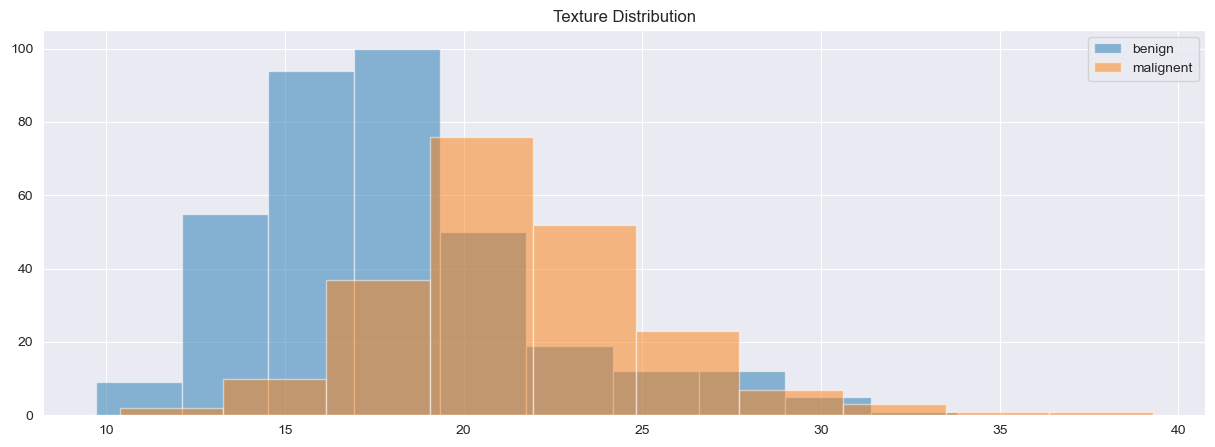

In [62]:
plt.hist(x=benign['texture_mean'], label='benign', alpha=0.5)
plt.hist(x=malignent['texture_mean'], label='malignent', alpha=0.5)
plt.legend()
plt.title('Texture Distribution')

plt.show()

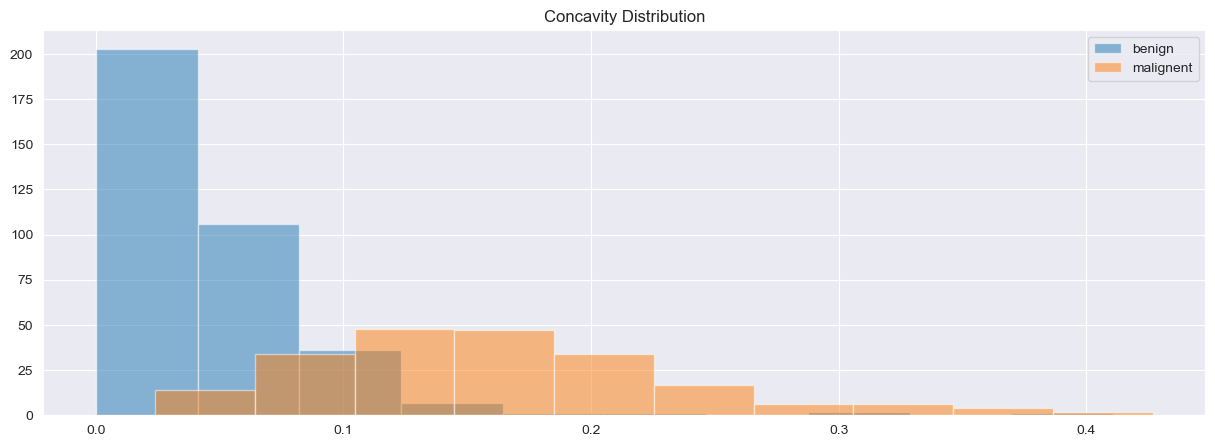

In [63]:
plt.hist(x=benign['concavity_mean'], label='benign', alpha=0.5)
plt.hist(x=malignent['concavity_mean'], label='malignent', alpha=0.5)
plt.legend()
plt.title('Concavity Distribution')

plt.show()

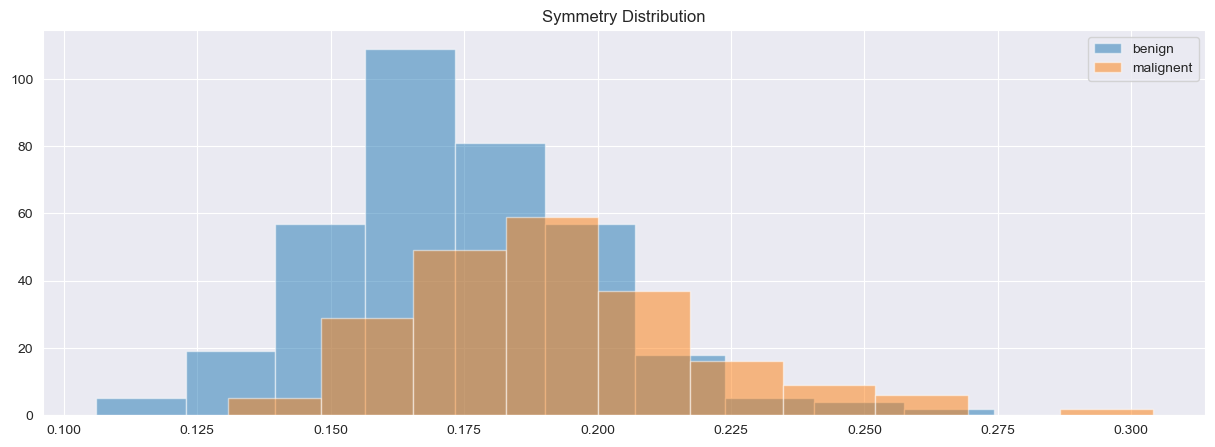

In [64]:
plt.hist(x=benign['symmetry_mean'], label='benign', alpha=0.5)
plt.hist(x=malignent['symmetry_mean'], label='malignent', alpha=0.5)
plt.legend()
plt.title('Symmetry Distribution')

plt.show()

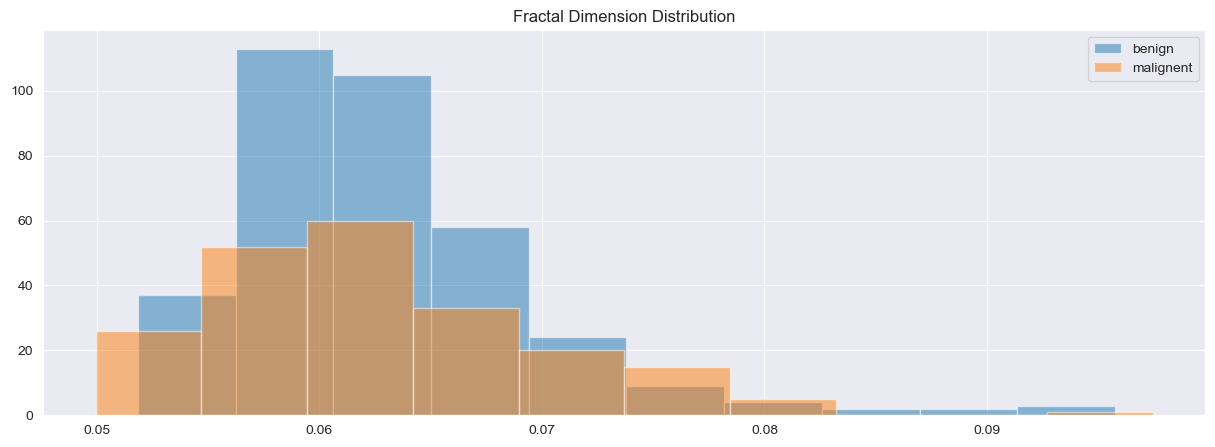

In [65]:
plt.hist(x=benign['fractal_dimension_mean'], label='benign', alpha=0.5)
plt.hist(x=malignent['fractal_dimension_mean'], label='malignent', alpha=0.5)
plt.legend()
plt.title('Fractal Dimension Distribution')

plt.show()

In [66]:
#now we standardize our data
X = cancer_df_copy.drop('diagnosis', axis=1)
y = cancer_df_copy['diagnosis']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [67]:
X.head()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.568466,2.652874,2.217515,2.255747
1,1.829821,-0.353632,-0.826962,-0.023846,0.001392,-0.868652
2,1.579888,0.456187,0.942210,1.363478,0.939685,-0.398008
3,-0.768909,0.253732,3.283553,1.915897,2.867383,4.910919
4,1.750297,-1.151816,0.280372,1.371011,-0.009560,-0.562450


In [68]:
X.describe()

,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-8.366672e-16,4.995028e-17,1.748260e-16,4.745277e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-3.112085e+00,-1.114873e+00,-2.744117e+00,-1.819865e+00
25%,-6.893853e-01,-7.259631e-01,-7.109628e-01,-7.437479e-01,-7.032397e-01,-7.226392e-01
50%,-2.150816e-01,-1.046362e-01,-3.489108e-02,-3.422399e-01,-7.162650e-02,-1.782793e-01
75%,4.693926e-01,5.841756e-01,6.361990e-01,5.260619e-01,5.307792e-01,4.709834e-01
max,3.971288e+00,4.651889e+00,4.770911e+00,4.243589e+00,4.484751e+00,4.910919e+00


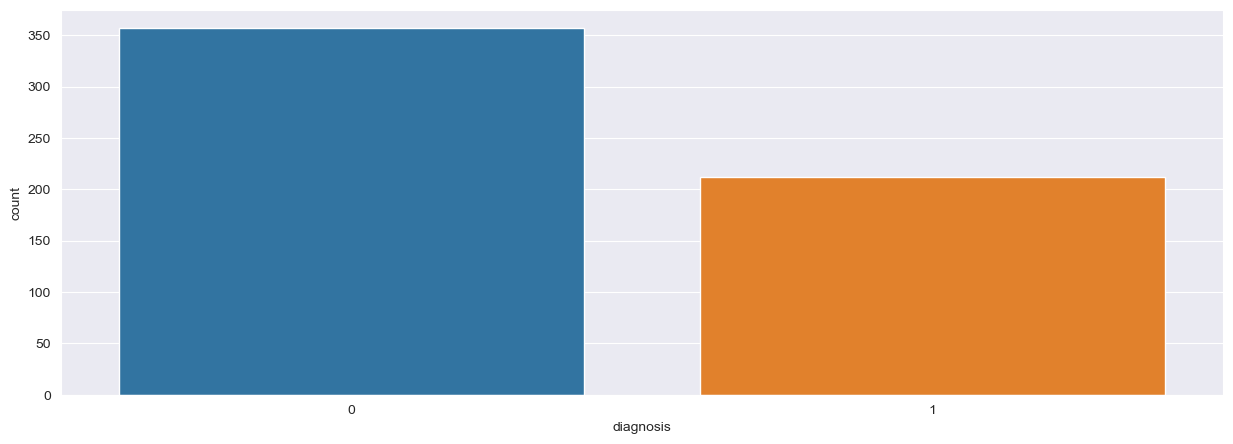

In [69]:
sns.countplot(x=cancer_df_copy['diagnosis'])
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [71]:
#not test different k values
test_scores = []
train_scores = []

# testing k values from 1-30
for i in range(1,31):
    # create a model with k=i
    knn = KNeighborsClassifier(n_neighbors=i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

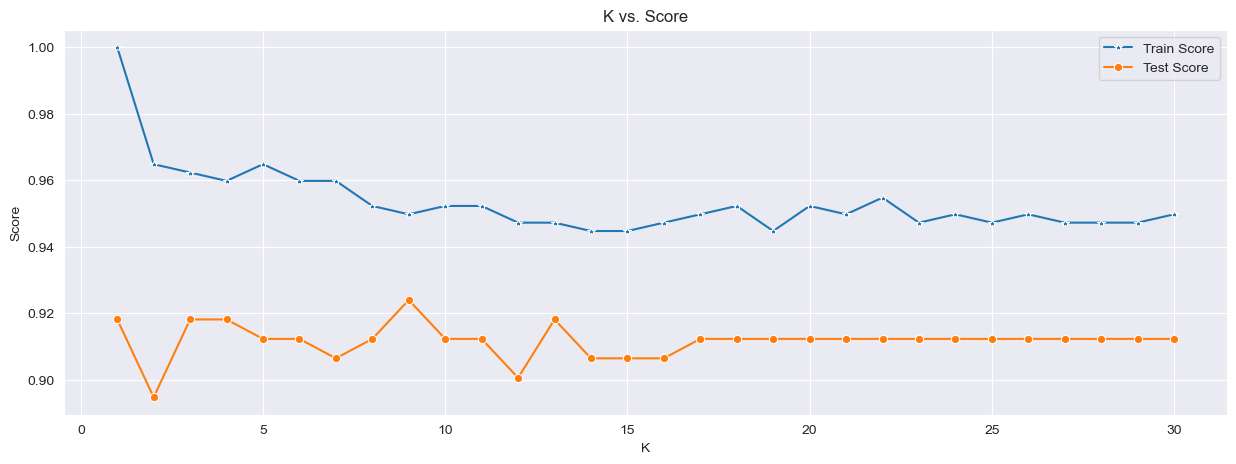

In [72]:
sns.lineplot(x=range(1,31), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,31), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [73]:
knn = KNeighborsClassifier(3)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9181286549707602

In [76]:
#score for k=9:
knn = KNeighborsClassifier(9)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9239766081871345

In [77]:
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       107
           1       0.96      0.83      0.89        64

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171

[[105   2]
 [ 11  53]]
